<h1>importing libraries
    </h1>
    

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

<h3>importing data set from california_houses</h3>

In [2]:
data=pd.read_csv("C:\\Users\\User\\Desktop\\term 7\\machine learning\\ML- Assignment 1\\California_Houses.csv",sep=',')
data.head()

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Latitude,Longitude,Distance_to_coast,Distance_to_LA,Distance_to_SanDiego,Distance_to_SanJose,Distance_to_SanFrancisco
0,452600.0,8.3252,41,880,129,322,126,37.88,-122.23,9263.040773,556529.158342,735501.806984,67432.517001,21250.213767
1,358500.0,8.3014,21,7099,1106,2401,1138,37.86,-122.22,10225.733072,554279.850069,733236.884360,65049.908574,20880.600400
2,352100.0,7.2574,52,1467,190,496,177,37.85,-122.24,8259.085109,554610.717069,733525.682937,64867.289833,18811.487450
3,341300.0,5.6431,52,1274,235,558,219,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568
4,342200.0,3.8462,52,1627,280,565,259,37.85,-122.25,7768.086571,555194.266086,734095.290744,65287.138412,18031.047568


<h3>exploring presence of null</h3>

In [3]:

data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Median_House_Value        20640 non-null  float64
 1   Median_Income             20640 non-null  float64
 2   Median_Age                20640 non-null  int64  
 3   Tot_Rooms                 20640 non-null  int64  
 4   Tot_Bedrooms              20640 non-null  int64  
 5   Population                20640 non-null  int64  
 6   Households                20640 non-null  int64  
 7   Latitude                  20640 non-null  float64
 8   Longitude                 20640 non-null  float64
 9   Distance_to_coast         20640 non-null  float64
 10  Distance_to_LA            20640 non-null  float64
 11  Distance_to_SanDiego      20640 non-null  float64
 12  Distance_to_SanJose       20640 non-null  float64
 13  Distance_to_SanFrancisco  20640 non-null  float64
dtypes: flo

Median_House_Value          0
Median_Income               0
Median_Age                  0
Tot_Rooms                   0
Tot_Bedrooms                0
Population                  0
Households                  0
Latitude                    0
Longitude                   0
Distance_to_coast           0
Distance_to_LA              0
Distance_to_SanDiego        0
Distance_to_SanJose         0
Distance_to_SanFrancisco    0
dtype: int64

<h3>explore data </h3>
<p>by heat map know the relation between diffrent features and median house value</p>

<Axes: >

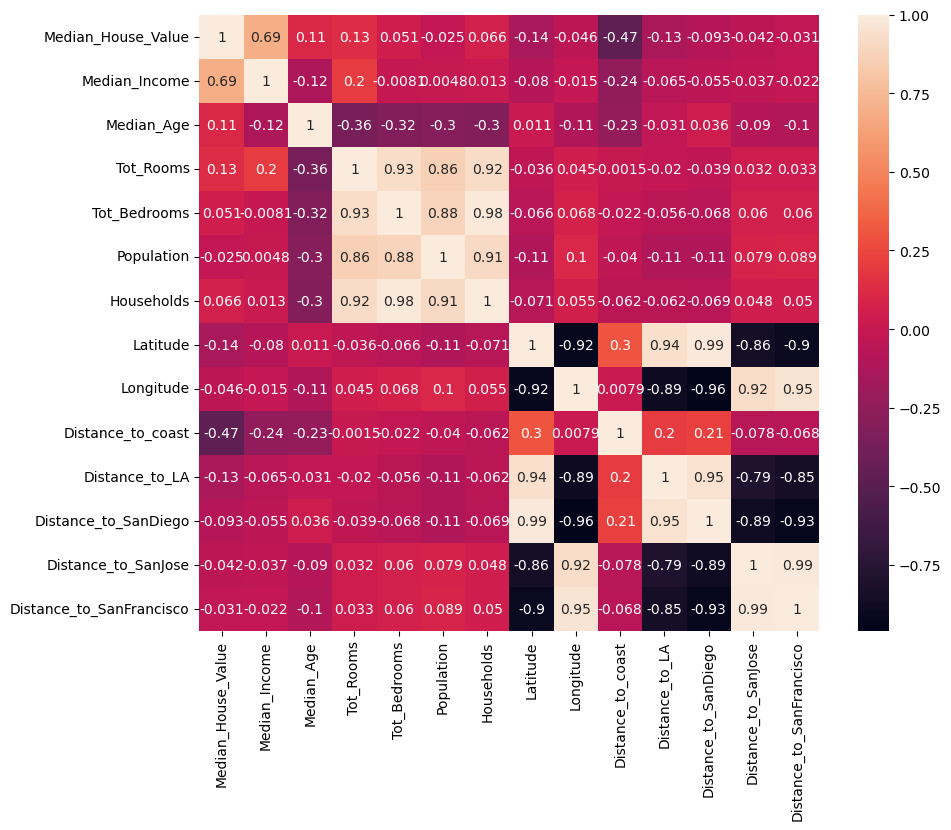

In [4]:

plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(),annot=True)


<h3> feature engineering</h3>
<p> we will edit our features a little to be more related to the target</p>

In [5]:
data["rooms per household"]=data["Tot_Rooms"]/data["Households"]
data["bedrooms ratio"]=data["Tot_Bedrooms"]/data["Tot_Rooms"]

<p> features relations with the target is in first row</p>

<Axes: >

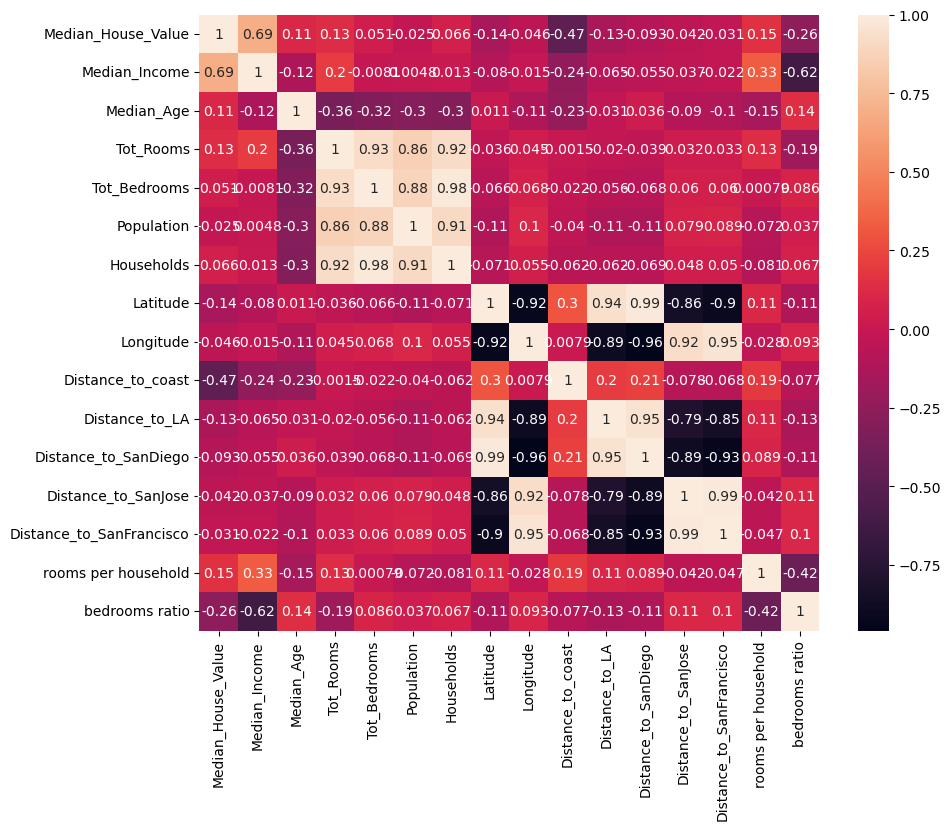

In [6]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(),annot=True)

<h3> dividing data into target and features</h3>
<p> the target is Y features X  </p>

In [7]:
#data=data.sample(frac=1).reset_index(drop=True)
print( data.iloc[0])
X=data.drop(['Median_House_Value'],axis=1).values
Y=data['Median_House_Value']
print(Y[0],X[0])
print(X.shape)
print(Y.shape)

Median_House_Value          452600.000000
Median_Income                    8.325200
Median_Age                      41.000000
Tot_Rooms                      880.000000
Tot_Bedrooms                   129.000000
Population                     322.000000
Households                     126.000000
Latitude                        37.880000
Longitude                     -122.230000
Distance_to_coast             9263.040773
Distance_to_LA              556529.158342
Distance_to_SanDiego        735501.806984
Distance_to_SanJose          67432.517001
Distance_to_SanFrancisco     21250.213767
rooms per household              6.984127
bedrooms ratio                   0.146591
Name: 0, dtype: float64
452600.0 [ 8.32520000e+00  4.10000000e+01  8.80000000e+02  1.29000000e+02
  3.22000000e+02  1.26000000e+02  3.78800000e+01 -1.22230000e+02
  9.26304077e+03  5.56529158e+05  7.35501807e+05  6.74325170e+04
  2.12502138e+04  6.98412698e+00  1.46590909e-01]
(20640, 15)
(20640,)


<h3> splitting data into training,test and validation set</h3>

In [8]:

X_train,X_tmp,Y_train,Y_tmp=train_test_split(X,Y,test_size=0.3,shuffle=False)
X_test,X_validation,Y_test,Y_validation=train_test_split(X_tmp,Y_tmp,test_size=0.5,shuffle=False)

<h3> features normalization</h3>
<p> we will normailze train features using z-score normalization using sklearn standard scaler
    </p><p> normalization will make the code run faster</p>

In [9]:
normalizer=StandardScaler()
X_train=normalizer.fit_transform(X_train)
X_validation=normalizer.transform(X_validation)
X_test = normalizer.transform(X_test)

<h3>linear regression model</h3>
<p> we are using LinearRegression from scikit learn to predict our model parameters which will use closed form</p>
<p> we are showing the values of linear regression coeff. and intercept</p>
<p> after fitting the X_train data we are predicting the values of validation set and comparing it with the real values by square mean error=1/n*(Y-T)^2 and absolute error = 1/n*|Y-T|</p>

[ 75803.89720473   7039.6097488   10058.11660382  -3433.80141268
 -56447.92673702  52248.89806459 -41305.84780781 -33844.29789046
 -17091.24160365 -47616.47746887  47117.25196558  20062.90219372
 -12648.06028832   8065.75332514  16197.28399327] 198579.60908080952
square error of validation set = 4173799576.2215676
absolute error of validation set = 45691.431313311856


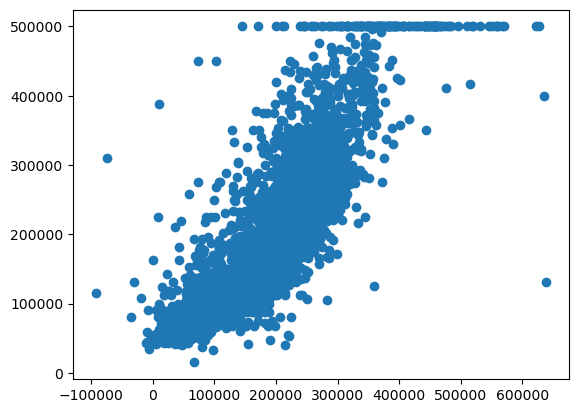

In [10]:

linear_regressor=LinearRegression(copy_X=True)
linear_regressor.fit(X_train,Y_train)
Y_pred=linear_regressor.predict(X_validation)
m=X_train[0].shape[0]

square_error=mean_squared_error(Y_pred,Y_validation)
plt.scatter(Y_pred,Y_validation)
w = linear_regressor.coef_
b = linear_regressor.intercept_
print(w,b)
print('square error of validation set = '+str(square_error))
absolute_error=mean_absolute_error(Y_pred,Y_validation)
print('absolute error of validation set = '+str(absolute_error))

<h3> regro regression</h3>
<p> it is like linear regression but we will add alpha(the values of w )^2 to the cost function to control thier values</p>
<p>This model solves a regression model where the loss function is the linear least squares function and regularization is given by the l2-norm</p>‘sag’ uses stochastic gradient descent

[ 75815.13567913   7074.53130529  10006.97595579  -3197.99692314
 -56382.65397027  52003.5634795  -39585.23129508 -33823.21641687
 -17302.66683689 -47177.25697984  45222.92129847  18663.9085198
 -11137.90361327   8042.31383297  16189.24310529] 198579.6090808097 [330]
square error of validation set = 4163511471.921321
absolute error of validation set = 45625.303862648485


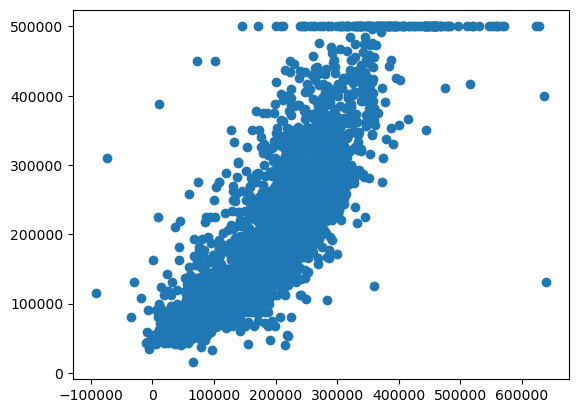

In [11]:
ridge_regressor=Ridge(alpha=1,max_iter=15000,solver='sag')
ridge_regressor.fit(X_train,Y_train)
Y_pred=ridge_regressor.predict(X_validation)
square_error=mean_squared_error(Y_pred,Y_validation)
plt.scatter(Y_pred,Y_validation)
w = ridge_regressor.coef_
b = ridge_regressor.intercept_
print(w,b,ridge_regressor.n_iter_)
print('square error of validation set = '+str(square_error))
absolute_error=mean_absolute_error(Y_pred,Y_validation)
print('absolute error of validation set = '+str(absolute_error))

<h3> lasso regression</h3>
<p>  Lasso is a modification of linear regression, where the model is penalized for the sum of absolute values of the weights (reg. is given by l1 norm)</p>

[ 75889.54086894   7164.95191264   9559.53378037  -2037.74213899
 -56186.92197141  51100.85583349 -35926.88998604 -33579.13458637
 -17888.7744708  -46106.6598839   41709.41615342  13856.86426187
  -5732.30522263   7943.15599644  16082.61312315] 198579.6090808103 1546
square error of validation set = 4122436723.160752
absolute error of validation set = 45366.54664666063


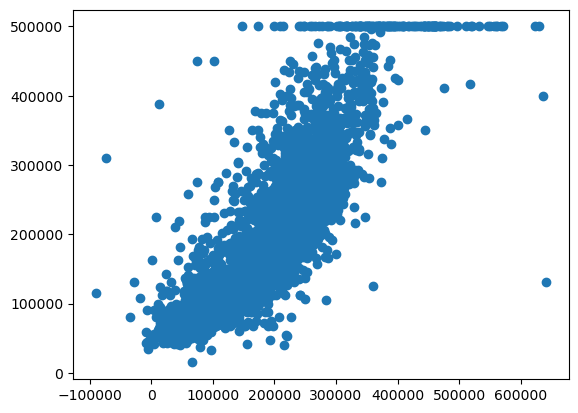

In [12]:
lasso_regressor=Lasso(alpha=11,max_iter=15000)
lasso_regressor.fit(X_train,Y_train)
Y_pred=lasso_regressor.predict(X_validation)
square_error=mean_squared_error(Y_pred,Y_validation)
plt.scatter(Y_pred,Y_validation)
w = lasso_regressor.coef_
b = lasso_regressor.intercept_
print(w,b,lasso_regressor.n_iter_)
print('square error of validation set = '+str(square_error))
absolute_error=mean_absolute_error(Y_pred,Y_validation)
print('absolute error of validation set = '+str(absolute_error))

<h3> test set results </h3>

linear regressor

In [13]:
Y_pred=linear_regressor.predict(X_test)
square_error=mean_squared_error(Y_pred,Y_test)
print('square error of validation set = '+str(square_error))
absolute_error=mean_absolute_error(Y_pred,Y_test)
print('absolute error of validation set = '+str(absolute_error))

square error of validation set = 8045115002.648703
absolute error of validation set = 63402.43471104235


ridge regressor

In [14]:
Y_pred=ridge_regressor.predict(X_test)
square_error=mean_squared_error(Y_pred,Y_test)
print('square error of validation set = '+str(square_error))
absolute_error=mean_absolute_error(Y_pred,Y_test)
print('absolute error of validation set = '+str(absolute_error))

square error of validation set = 8059398360.498847
absolute error of validation set = 63497.06275742297


lasso_regressor

In [15]:
Y_pred=lasso_regressor.predict(X_test)
square_error=mean_squared_error(Y_pred,Y_test)
print('square error of validation set = '+str(square_error))
absolute_error=mean_absolute_error(Y_pred,Y_test)
print('absolute error of validation set = '+str(absolute_error))

square error of validation set = 8103941831.054854
absolute error of validation set = 63770.90481525906
